In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Glucose'].value_counts()

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

In [7]:
df.drop(columns=['Glucose', 'BMI', 'Insulin', 'Age', 'Outcome'], inplace=True)

In [8]:
df.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction
0,6,72,35,0.627
1,1,66,29,0.351
2,8,64,0,0.672
3,1,66,23,0.167
4,0,40,35,2.288


In [9]:
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [10]:
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(df,columns=['BloodPressure','SkinThickness'],drop_first=True)

In [12]:
df.head()

,Pregnancies,DiabetesPedigreeFunction,BloodPressure_24,BloodPressure_30,BloodPressure_38,BloodPressure_40,BloodPressure_44,BloodPressure_46,BloodPressure_48,BloodPressure_50,...,SkinThickness_48,SkinThickness_49,SkinThickness_50,SkinThickness_51,SkinThickness_52,SkinThickness_54,SkinThickness_56,SkinThickness_60,SkinThickness_63,SkinThickness_99
0,6,0.627,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.351,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8,0.672,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.167,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2.288,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
X = df.drop(columns=['Pregnancies'])
y = df['Pregnancies'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X

,DiabetesPedigreeFunction,BloodPressure_24,BloodPressure_30,BloodPressure_38,BloodPressure_40,BloodPressure_44,BloodPressure_46,BloodPressure_48,BloodPressure_50,BloodPressure_52,...,SkinThickness_48,SkinThickness_49,SkinThickness_50,SkinThickness_51,SkinThickness_52,SkinThickness_54,SkinThickness_56,SkinThickness_60,SkinThickness_63,SkinThickness_99
0,0.627,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.351,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.672,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.167,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.288,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.171,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
764,0.340,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
765,0.245,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
766,0.349,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
y

array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  8,  4, 10, 10,  1,  5,  7,  0,
        7,  1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6,
       10,  4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  7,  1,
        1,  5,  8,  7,  1,  7,  0,  0,  0,  2,  8,  5,  2,  7,  5,  0,  2,
        1,  4,  2,  5, 13,  4,  1,  1,  7,  5,  0,  2,  3,  2,  7,  0,  5,
        2, 13,  2, 15,  1,  1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,
        0,  1,  2,  1,  1,  4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,
        4,  0,  6,  2,  5,  0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,
        0,  0,  0,  5,  3,  5,  2, 10,  4,  0,  9,  2,  5,  2,  1,  4,  9,
        1,  8,  7,  2,  1,  2, 17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,
        6,  6,  2,  1,  2,  8,  6,  0,  5,  5,  6,  0,  1,  5,  4,  7,  8,
        1,  8,  5,  3,  9,  7, 11,  8,  5,  1,  3,  4,  4,  0,  1,  0,  2,
        6,  5,  8,  5,  1,  7,  2,  0,  7,  0,  9, 12,  5,  6,  5,  5,  0,
        2,  7,  7,  1,  1

In [16]:
X_train

,DiabetesPedigreeFunction,BloodPressure_24,BloodPressure_30,BloodPressure_38,BloodPressure_40,BloodPressure_44,BloodPressure_46,BloodPressure_48,BloodPressure_50,BloodPressure_52,...,SkinThickness_48,SkinThickness_49,SkinThickness_50,SkinThickness_51,SkinThickness_52,SkinThickness_54,SkinThickness_56,SkinThickness_60,SkinThickness_63,SkinThickness_99
603,0.692,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118,0.443,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
247,0.427,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
157,0.833,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
468,0.183,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.171,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
192,0.383,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
629,0.148,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
559,0.300,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
X_train.shape

(614, 97)

In [18]:
y_train.shape

(614,)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [20]:
X_train_trf

array([[ 0.67740401, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [-0.07049698, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [-0.11855487, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       ...,
       [-0.95656442, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [-0.50001442, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [ 0.52121586, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962]])

In [21]:
X_test_trf

array([[ 2.78594417, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [-0.1876381 , -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [-0.22668514, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       ...,
       [ 0.53623395, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [-1.07971278, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962],
       [ 1.06487079, -0.04038962, -0.04038962, ..., -0.04038962,
        -0.04038962, -0.04038962]])

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

X = df.drop(columns=['Outcome'])
y = df['Outcome']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # input_dim = number of features
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)


2025-08-21 08:23:19.375533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755764599.645416      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755764599.729185      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-21 08:23:34.721978: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6800 - loss: 0.6198 - val_accuracy: 0.6585 - val_loss: 0.6353
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.6089 - val_accuracy: 0.6585 - val_loss: 0.6234
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6772 - loss: 0.5847 - val_accuracy: 0.6504 - val_loss: 0.6123
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6688 - loss: 0.5675 - val_accuracy: 0.6423 - val_loss: 0.6027
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6776 - loss: 0.5643 - val_accuracy: 0.6423 - val_loss: 0.5940
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6834 - loss: 0.5537 - val_accuracy: 0.6585 - val_loss: 0.5861
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7149 - loss: 0.5088 - val_accuracy: 0.6504 - val_loss: 0.5794
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6848 - loss: 0.5374 - val_accuracy: 0.6504 - val_loss: 0.

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

In [25]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.layers[0].get_weights()

[array([[ 3.4140074e-01, -1.1482711e-02, -2.1407062e-01, -1.2799188e-02,
         -7.0883974e-02,  2.1691674e-01, -1.9163197e-02,  4.7974783e-01,
          6.8561588e-03, -2.0585223e-01, -1.2226964e-01, -1.8813147e-01,
          5.9270227e-01,  2.3547833e-01, -6.1571622e-01,  5.3841126e-01],
        [ 6.8780857e-01, -2.4970098e-01, -5.3256553e-01, -5.7640773e-01,
         -7.1594036e-01, -3.9828762e-01, -4.3154943e-01,  2.4550685e-01,
         -3.3235553e-01,  1.8362373e-02, -1.7588051e-01,  4.8241526e-01,
         -3.4167424e-01, -3.4887540e-01, -1.0891659e-01,  4.4787511e-01],
        [-3.7776145e-01, -6.2751192e-01, -2.7653750e-04,  4.9591216e-01,
          1.2164361e-01, -2.8904930e-01, -3.8532627e-01,  2.7369177e-01,
          4.7498399e-01,  4.5904145e-01,  1.0723374e-01,  1.0561426e-01,
          1.2616707e-01,  1.9244221e-01,  2.0769963e-01, -5.9609091e-01],
        [-1.6900761e-01,  3.5597838e-02,  2.7131966e-01,  3.2470885e-01,
         -1.1455169e-03, -1.5854684e-01,  1.9105

In [27]:
model.layers[1].get_weights()

[array([[-0.19022816,  0.49836403, -0.23910457, -0.5118227 ,  0.2574982 ,
         -0.24816981, -0.47942504, -0.4110042 ],
        [-0.51500124,  0.13308631, -0.13550031,  0.6792835 ,  0.13228884,
          0.21644777, -0.54381937, -0.47832847],
        [ 0.09341229, -0.4555457 ,  0.27363986,  0.20287776,  0.17790987,
          0.06122293, -0.24322103,  0.0175046 ],
        [-0.436927  , -0.42495298, -0.0062345 ,  0.21463193,  0.16349582,
          0.10688843,  0.0385184 ,  0.41140872],
        [-0.5350622 ,  0.08225349,  0.6906292 ,  0.41221356,  0.39220428,
          0.3386867 , -0.04845911, -0.5281269 ],
        [ 0.07240193, -0.2733423 , -0.4561875 ,  0.1309708 , -0.14781557,
         -0.44941399, -0.29162532, -0.15470071],
        [-0.28473717, -0.45970273, -0.2607663 ,  0.47623   ,  0.31138796,
          0.46664155,  0.11482459,  0.2319567 ],
        [ 0.3532226 ,  0.36275986,  0.06844636, -0.23553343, -0.4454966 ,
         -0.33111784, -0.03478069,  0.20561749],
        [-0.2699

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)   # fit + transform on train
X_test_trf  = scaler.transform(X_test)        # transform only on test (not fit again!)

print("Train shape:", X_train_trf.shape)
print("Test shape:", X_test_trf.shape)


Train shape: (614, 8)
Test shape: (154, 8)


In [29]:
y_log=model.predict(X_test_trf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [30]:
y_pred=np.where(y_log>0.5,1,0)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7272727272727273

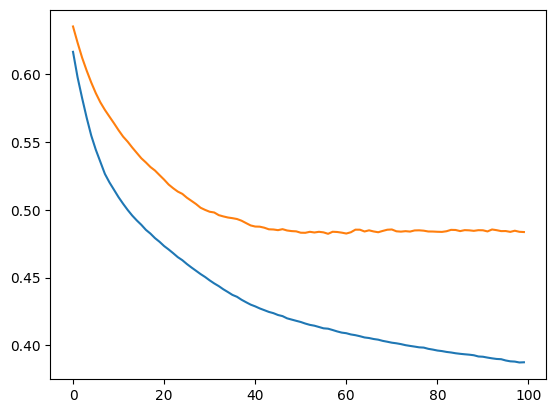

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

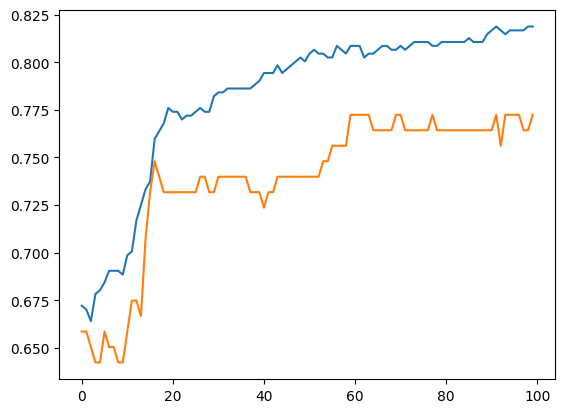

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])